### Machine Learning Techniques (MLT - Session 1)

1. The target for the Regression is the numerical values while the target for Classification is categorical values. 
2. These 2 methods are used to train a Machine.
3. A traditional program used to take a data which was put in a model (program) and fed into the computer to generate the output.
4. However, in MLT, we generate the model (program) based on the data and the required output as an input to the computer.

### Introduction to Machine Learning - Linear Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sal = pd.read_csv('SalaryData.csv')

In [3]:
sal

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


### Data Exploration 

In [12]:
x = sal['YearsExperience'] # feature. It is better to write the independent variable in caps. Conventional approach.
y = sal['Salary'] # target

In [13]:
x

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64

In [14]:
y

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64

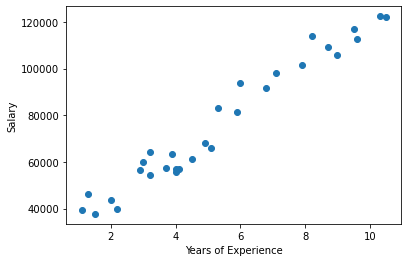

In [15]:
# Visualization
plt.scatter(x,y);
plt.xlabel('Years of Experience');
plt.ylabel('Salary');

### Problem formulation

y depends on x linearly. The equation can be defined as y = ax + b, where a and b are unknown.

### Splitting data: Train and Test

In [11]:
from sklearn.model_selection import train_test_split # sklearn is another Python library used for MLT.

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 100)

In [17]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((24,), (6,), (24,), (6,))

In [18]:
x_train

27     9.6
25     9.0
6      3.0
17     5.3
22     7.9
11     4.0
4      2.2
29    10.5
0      1.1
1      1.3
18     5.9
14     4.5
19     6.0
21     7.1
2      1.5
20     6.8
10     3.9
16     5.1
15     4.9
23     8.2
7      3.2
3      2.0
24     8.7
8      3.2
Name: YearsExperience, dtype: float64

In [19]:
x_test

9      3.7
26     9.5
28    10.3
13     4.1
5      2.9
12     4.0
Name: YearsExperience, dtype: float64

In [20]:
y_train

27    112635
25    105582
6      60150
17     83088
22    101302
11     55794
4      39891
29    121872
0      39343
1      46205
18     81363
14     61111
19     93940
21     98273
2      37731
20     91738
10     63218
16     66029
15     67938
23    113812
7      54445
3      43525
24    109431
8      64445
Name: Salary, dtype: int64

In [21]:
y_test

9      57189
26    116969
28    122391
13     57081
5      56642
12     56957
Name: Salary, dtype: int64

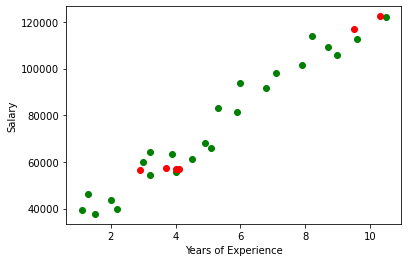

In [22]:
# Visualization
plt.scatter(x_train,y_train, c = 'green');
plt.scatter(x_test,y_test, c = 'red');
plt.xlabel('Years of Experience');
plt.ylabel('Salary');

### Model Building

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
# Our model
lr = LinearRegression()

### Training the model

In [25]:
lr.fit (x_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[ 9.6  9.   3.   5.3  7.9  4.   2.2 10.5  1.1  1.3  5.9  4.5  6.   7.1
  1.5  6.8  3.9  5.1  4.9  8.2  3.2  2.   8.7  3.2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [26]:
lr.fit (x_train.to_numpy().reshape(-1,1), y_train)

LinearRegression()

### Predicting using the model

In [30]:
y_pred = lr.predict(x_test.to_numpy().reshape(-1,1))
y_pred

array([ 61455.19576289, 115749.67082676, 123238.56393901,  65199.64231902,
        53966.30265063,  64263.53067999])

In [31]:
y_test

9      57189
26    116969
28    122391
13     57081
5      56642
12     56957
Name: Salary, dtype: int64

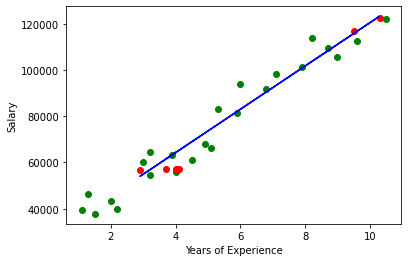

In [32]:
# Visualization
plt.scatter(x_train,y_train, c = 'green');
plt.scatter(x_test,y_test, c = 'red');
plt.plot(x_test, y_pred, c = 'blue');
plt.xlabel('Years of Experience');
plt.ylabel('Salary');

### Regression Equation

In [33]:
a = lr.coef_
a

array([9361.11639032])

In [34]:
b = lr.intercept_
b

26819.06511870089

In [37]:
print ("The regression line:", "y =", a, ".x +", b)

The regression line: y = [9361.11639032] .x + 26819.06511870089
